In [1]:
#important packages
import PIL
from PIL import Image, ImageEnhance, ImageDraw, ImageFont
import numpy as np

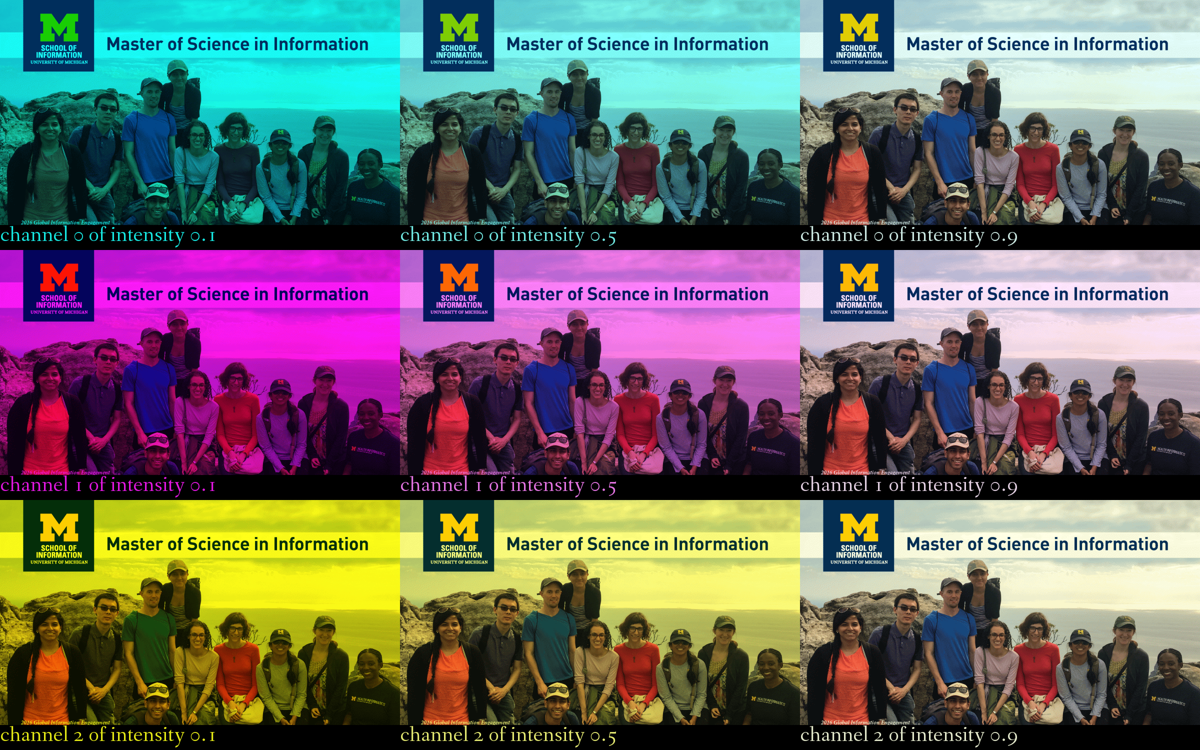

In [2]:
# let's select our font first
font = ImageFont.truetype('fanwood-webfont.ttf', 45)

# reading the image and convert it to RGB
image = Image.open("msi_recruitment.gif")
image = image.convert('RGB') 

# creating a contact sheet
## Note : i will draw a box under each picture with height of 50
contact_sheet = PIL.Image.new(image.mode, (image.width*3,(image.height+50)*3))

# Because i will do the same process to each of the three channels separately.i prefered to make a general function
def adjust_image(channel_idx, contact_sheet):
    """
    function arguments:
    - channel : 0(Red), 1(Green), 2(Blue) 
    - contact_sheet : the contact-sheet variable that we will work on
    """
    adjs    = [0.1, 0.5, 0.9]
    img_idx = 0 
    for col, adj in enumerate(adjs):
        # Let's convert our image to a numpy array to make dealing with channels much easier (fresh copy)
        im = np.array(image).astype(np.float)
        # Let's change the intensity of the specified channel
        im[:,:,channel_idx] *= adj
        # Let's convert our array back into an image
        img = Image.fromarray(im.astype(np.uint8))
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (col*img.width, channel_idx*(img.height+50)))
        # now let's put our text
        ## first let's draw a black box to put our text on
        box = Image.new('RGB', (img.width, 50), color = (0, 0, 0))
        ## now it's time for our text
        draw = ImageDraw.Draw(box)
        ## Note: 100 is a random number
        draw.text((0, 0), 'channel {} of intensity {}'.format(channel_idx,adj), font = font, fill = img.getpixel((100, 100)))
        ## now our box ready to be added to our contact sheet
        contact_sheet.paste(box, (col*img.width, channel_idx*(img.height+50)+img.height))
        
        img_idx += 1

# now our function is ready. let's iterate over the three channels
for ch in range(3):
    adjust_image(ch, contact_sheet)
    
# resize and display the contact sheet
contact_sheet = contact_sheet.resize((contact_sheet.width//2, contact_sheet.height//2))
display(contact_sheet)